In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
df=pd.read_csv('train.csv')
train_features=df.iloc[:,[1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
train_label=df.iloc[:,[0]]
dftest=pd.read_csv('test.csv')
test_features=dftest.iloc[:,[1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
test_label=dftest.iloc[:,[0]]
model = tf.keras.Sequential()
model.add(Dense(32,activation='relu',input_shape=(24,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [23]:
predictions = model.predict(test_features)
predicted_labels = [0 if prediction[1] > prediction[0] else 1 for prediction in predictions]
correct_predictions = sum([0 if predicted_label == true_label else 1 for predicted_label, true_label in zip(predicted_labels, test_label)])
accuracy = correct_predictions / len(test_label)
print('Accuracy:', accuracy)


31/31 [==============================] - 0s 728us/step
Accuracy: 0.0010309278350515464


In [20]:
loss, accuracy = model.evaluate(test_features, test_label)

31/31 [==============================] - 0s 1ms/step - loss: 0.5000


TypeError: cannot unpack non-iterable float object

In [19]:
print(*predictions)

[0.71416026 0.28583974] [0.7224543 0.2775456] [0.41123834 0.5887617 ] [0.2021957 0.7978043] [0.52129984 0.47870022] [0.4561656 0.5438344] [0.44635049 0.55364954] [0.48690525 0.5130948 ] [0.5717199 0.4282801] [0.4674239  0.53257614] [0.06267571 0.9373243 ] [0.49468827 0.5053118 ] [0.49499813 0.50500184] [0.44065258 0.5593474 ] [0.438835   0.56116503] [0.4125736  0.58742636] [0.47443613 0.5255638 ] [0.52382857 0.47617143] [0.48026633 0.51973367] [0.61184865 0.38815135] [0.5499522 0.4500478] [0.46295387 0.53704613] [9.998976e-01 1.023424e-04] [0.516645   0.48335502] [0.71168923 0.2883107 ] [0.8632782 0.1367218] [0.4884016 0.5115984] [0.27799717 0.72200286] [0.86605424 0.1339458 ] [0.5176128 0.4823872] [9.994288e-01 5.711905e-04] [0.48513567 0.5148644 ] [0.47811952 0.52188045] [0.9974369  0.00256306] [0.47543693 0.5245631 ] [9.999020e-01 9.798273e-05] [0.4887333 0.5112667] [0.44045892 0.5595411 ] [0.4997759 0.5002241] [0.60889024 0.39110973] [0.35736862 0.64263135] [0.5245374  0.47546262] 

In [24]:
print(len(df.columns))

31


In [27]:
train_features.head(5)

,gender,bmi,waist,fep,tip,pxp,frp,TCP,crp,uap,...,gbp,ghp,c1p,ast,alt,trig,ggt,ins,hdl,fglu
0,0,37.0,108.500000,44,336,13.100000,186,156,1.54,5.7,...,3.4,5.0,0.878,19,14,171,17,7.890000,42,84.900002
1,1,27.9,97.400002,123,320,38.400002,106,182,0.21,5.6,...,2.5,4.9,0.345,30,38,96,20,8.520001,39,94.599998
2,0,17.9,64.199997,28,388,7.200000,127,221,1.54,2.6,...,4.8,9.9,0.021,22,9,76,19,17.410000,77,142.600010
3,0,18.9,71.500000,181,376,48.099998,38,177,0.33,3.5,...,3.1,4.6,0.063,18,8,56,17,4.590000,82,82.800003
4,0,23.9,77.199997,74,368,20.100000,11,218,0.21,2.2,...,3.1,4.4,0.409,16,10,71,8,6.030000,81,85.300003


In [19]:
train_data=df.iloc[:,[7,8,21,22,24,25,27,29]]
train_data.head(5)

,age,bmi,gbp,ghp,ast,alt,ggt,hdl
0,56,37.0,3.4,5.0,19,14,17,42
1,28,27.9,2.5,4.9,30,38,20,39
2,21,17.9,4.8,9.9,22,9,19,77
3,25,18.9,3.1,4.6,18,8,17,82
4,41,23.9,3.1,4.4,16,10,8,81


In [28]:
train_label.head(5)

,us
0,0
1,0
2,1
3,0
4,0


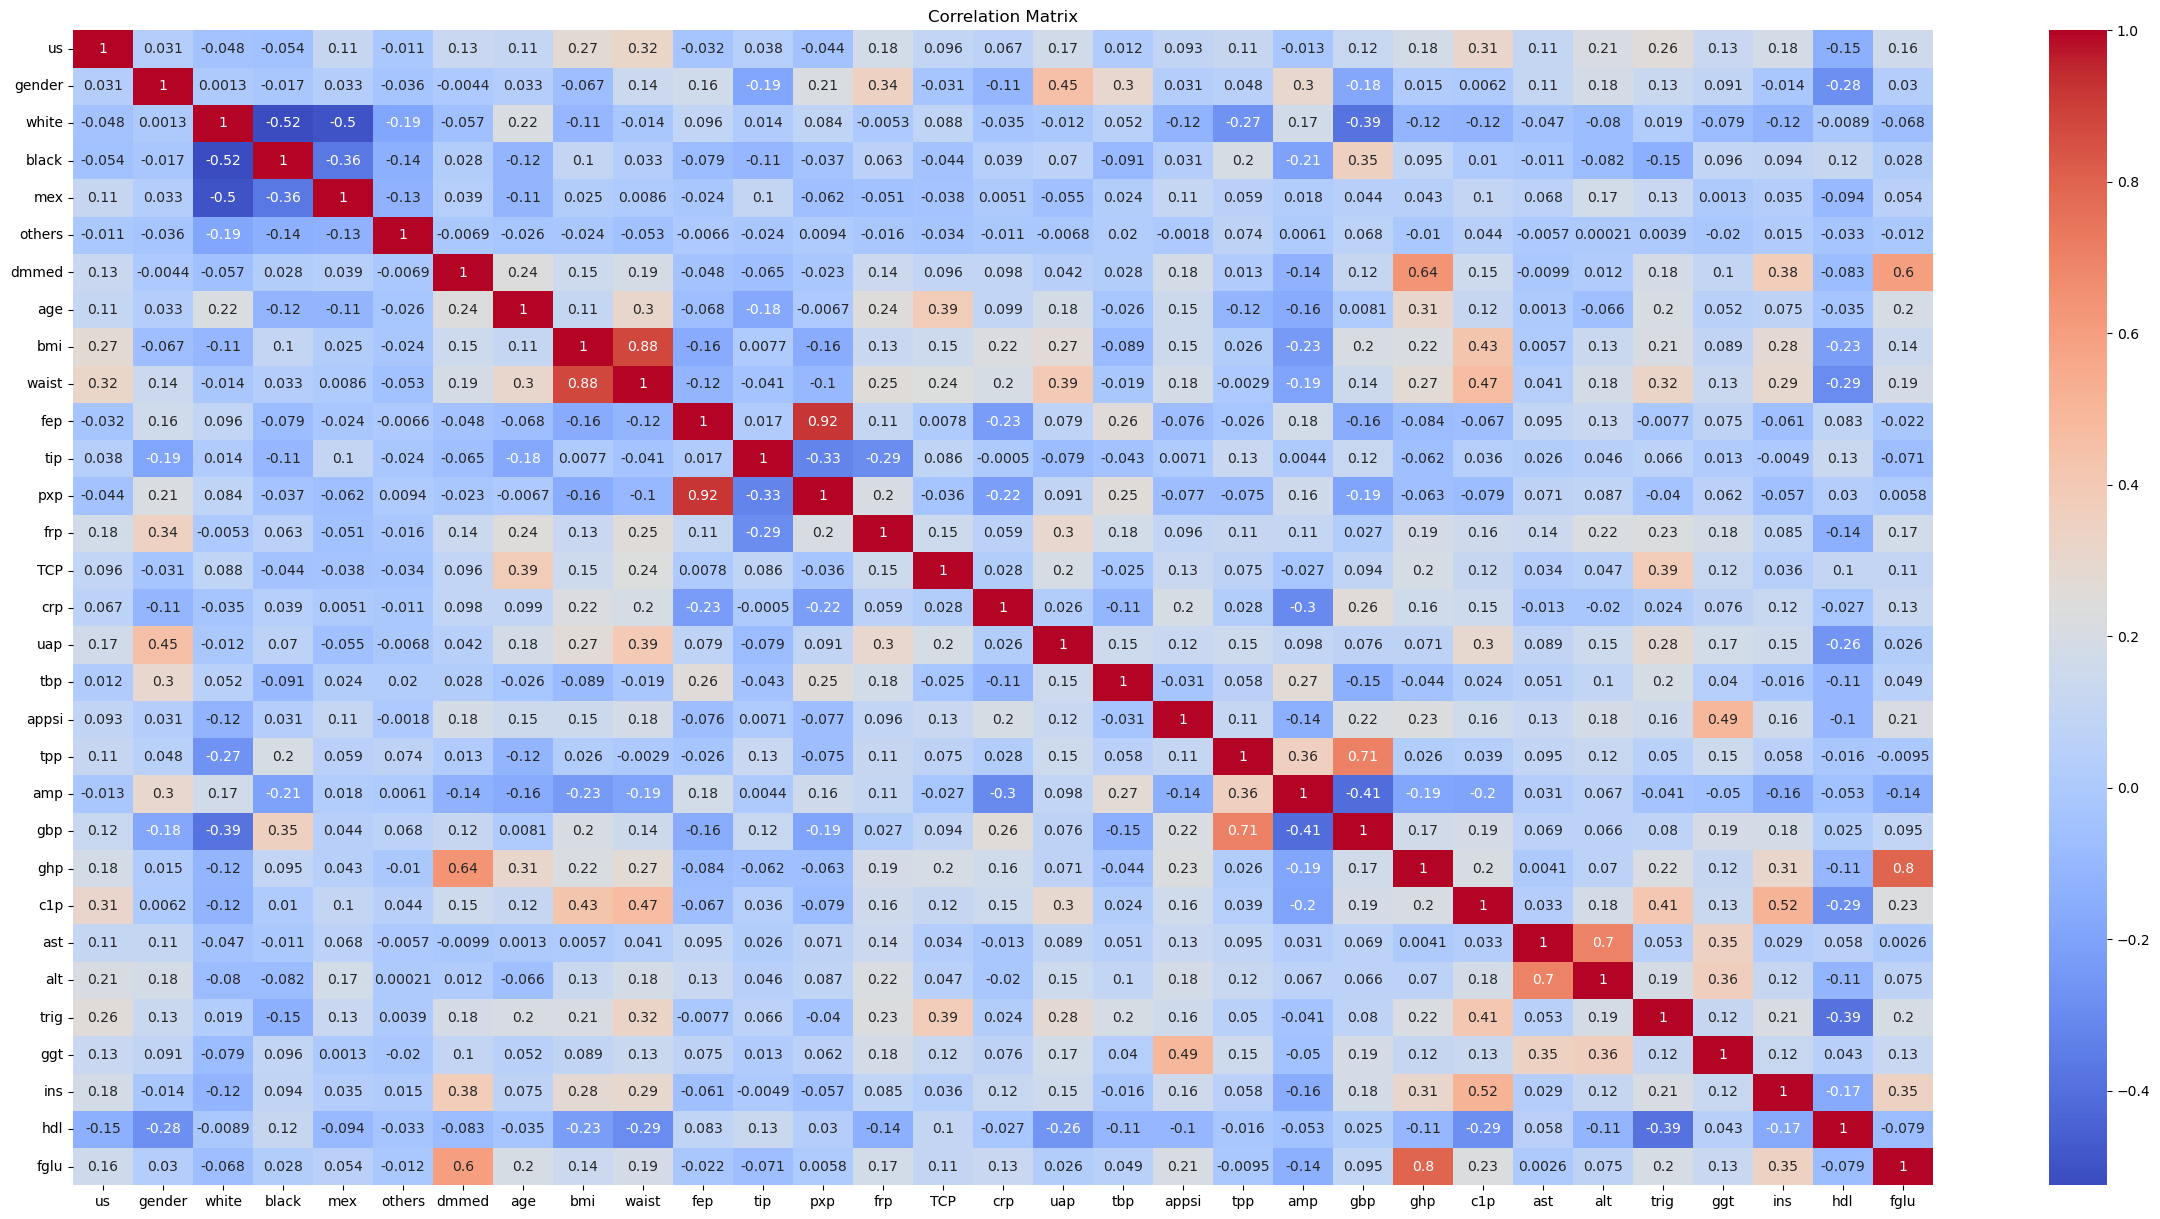

In [2]:
# Step 3: Feature selection (using correlation analysis)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify the features highly correlated with the target
target_corr_threshold = 0.2  # Adjust the threshold as needed
target_correlation = corr_matrix['us']
selected_features = target_correlation[abs(target_correlation) > target_corr_threshold].index.tolist()

# Step 4: Continue with the neural network architecture design and follow the subsequent steps accordingly


In [12]:
import pandas as pd

# Read the Excel file
dataxl = pd.read_excel('data.xlsx')

# Convert DataFrame to CSV format
dataxl.to_csv('data.csv', index=False)


In [16]:
print(selected_features)

['us', 'bmi', 'waist', 'c1p', 'alt', 'trig']


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)
y = data['us']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance scores
importance_scores = rf.feature_importances_

# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features
print(feature_importance_df)


   Feature  Importance
8    waist    0.077185
22     c1p    0.073958
27     ins    0.068552
25    trig    0.058186
7      bmi    0.053794
24     alt    0.044986
26     ggt    0.044285
12     frp    0.042659
29    fglu    0.039579
13     TCP    0.038462
6      age    0.037866
10     tip    0.036976
17   appsi    0.035538
23     ast    0.034965
15     uap    0.034775
28     hdl    0.034101
21     ghp    0.033043
9      fep    0.032798
11     pxp    0.032536
18     tpp    0.027638
19     amp    0.026652
20     gbp    0.024856
14     crp    0.020384
16     tbp    0.018701
3      mex    0.006713
2    black    0.006619
1    white    0.004579
0   gender    0.004135
5    dmmed    0.003119
4   others    0.002360


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Get the feature importance based on the absolute value of the PCA components
feature_importance = pd.Series(abs(pca.components_[0]), index=X.columns)

# Sort the features by importance in descending order
sorted_features = feature_importance.sort_values(ascending=False)

# Print the important features
print("Important Features based on PCA:")
print(sorted_features)


Important Features based on PCA:
waist     0.332286
ghp       0.295455
bmi       0.292543
c1p       0.292469
fglu      0.261600
ins       0.259579
trig      0.245833
dmmed     0.244269
appsi     0.211124
uap       0.200957
gbp       0.192782
frp       0.177899
age       0.172804
ggt       0.170720
hdl       0.159085
TCP       0.156604
crp       0.150817
alt       0.147120
amp       0.142122
white     0.103613
tpp       0.087144
fep       0.083487
ast       0.079992
pxp       0.073468
black     0.064137
gender    0.058997
mex       0.052351
tip       0.024884
others    0.002272
tbp       0.001724
dtype: float64


In [3]:
print(data)

      us  gender  white  black  mex  others  dmmed  age        bmi  \
0      0       0      1      0    0       0      0   56  37.000000   
1      0       1      0      0    1       0      0   28  27.900000   
2      1       0      0      1    0       0      1   21  17.900000   
3      0       0      1      0    0       0      0   25  18.900000   
4      0       0      1      0    0       0      0   41  23.900000   
...   ..     ...    ...    ...  ...     ...    ...  ...        ...   
3230   1       1      0      1    0       0      0   29  27.000000   
3231   1       0      0      0    1       0      0   41  27.299999   
3232   0       0      0      1    0       0      0   34  36.700001   
3233   0       0      0      0    0       1      0   42  24.200001   
3234   0       1      0      0    1       0      0   63  21.000000   

           waist  ...  gbp  ghp    c1p  ast  alt  trig  ggt        ins  hdl  \
0     108.500000  ...  3.4  5.0  0.878   19   14   171   17   7.890000   42   
1

In [ ]:
waist     8
ghp    21   
bmi    7   
c1p 22      
fglu   29   
ins   27
trig   25
alt   24

In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Load the dataset
df = pd.read_csv('train.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
train_data=df.iloc[:,[7,8,21,22,24,25,27,29]]
train_labels=df.iloc[:,[0]]
dftest=pd.read_csv('test.csv')
val_data=dftest.iloc[:,[7,8,21,22,24,25,27,29]]
val_labels=dftest.iloc[:,[0]]

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=30, batch_size=128, validation_data=(val_data, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_data, val_labels)
print('Validation accuracy:', accuracy)

val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)
precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)


Epoch 1/30
18/18 [==============================] - 1s 12ms/step - loss: 6.9979 - accuracy: 0.6494 - val_loss: 6.5291 - val_accuracy: 0.7454
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 6.6999 - accuracy: 0.6901 - val_loss: 6.4016 - val_accuracy: 0.7495
Epoch 3/30
18/18 [==============================] - 0s 4ms/step - loss: 6.4987 - accuracy: 0.6918 - val_loss: 6.2525 - val_accuracy: 0.7691
Epoch 4/30
18/18 [==============================] - 0s 4ms/step - loss: 6.3262 - accuracy: 0.7219 - val_loss: 6.1172 - val_accuracy: 0.7598
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 6.1643 - accuracy: 0.7077 - val_loss: 5.9866 - val_accuracy: 0.7660
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 6.0270 - accuracy: 0.7196 - val_loss: 5.8729 - val_accuracy: 0.7598
Epoch 7/30
18/18 [==============================] - 0s 4ms/step - loss: 5.9046 - accuracy: 0.7121 - val_loss: 5.7504 - val_accuracy: 0.7598
Epoch 8/30
18/18 [=

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1=df.iloc[:,[7,8,21,22,24,25,27,29]]
train_labels=df.iloc[:,[0]]
dftest=pd.read_csv('test.csv')
val_data1=dftest.iloc[:,[7,8,21,22,24,25,27,29]]
val_labels=dftest.iloc[:,[0]]



# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data)

# Scale the training data
train_data= scaler.transform(train_data1)

# Scale the validation data
val_data = scaler.transform(val_data1)











# Reshape the data for CNN input
train_data = train_data.values.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.values.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)

# Scale the validation data
val_data = scaler.transform(val_data1)

# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)


Epoch 1/50
71/71 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7391 - val_loss: 0.5082 - val_accuracy: 0.7670
Epoch 2/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7638 - val_loss: 0.4965 - val_accuracy: 0.7701
Epoch 3/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7656 - val_loss: 0.4915 - val_accuracy: 0.7691
Epoch 4/50
71/71 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7660 - val_loss: 0.4907 - val_accuracy: 0.7680
Epoch 5/50
71/71 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7695 - val_loss: 0.4901 - val_accuracy: 0.7701
Epoch 6/50
71/71 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7731 - val_loss: 0.4870 - val_accuracy: 0.7794
Epoch 7/50
71/71 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7775 - val_loss: 0.4858 - val_accuracy: 0.7753
Epoch 8/50
71/71 [==

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, feature scaling, etc.)
# ...

# Split the dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(df.iloc[:, 1:], df['us'].values, test_size=0.2, random_state=42)
# Perform feature scaling
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)

# Reshape the data for CNN input
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
val_data = np.reshape(val_data, (val_data.shape[0], val_data.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data, val_labels)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Epoch 1/50
81/81 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.7651 - val_loss: 0.4672 - val_accuracy: 0.7790
Epoch 2/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7685 - val_loss: 0.4677 - val_accuracy: 0.7713
Epoch 3/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7859 - val_loss: 0.4543 - val_accuracy: 0.7883
Epoch 4/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7828 - val_loss: 0.4516 - val_accuracy: 0.7836
Epoch 5/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7902 - val_loss: 0.4473 - val_accuracy: 0.7805
Epoch 6/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7840 - val_loss: 0.4476 - val_accuracy: 0.7929
Epoch 7/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7944 - val_loss: 0.4486 - val_accuracy: 0.7929
Epoch 8/50
81/81 [==

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape the data for 1D CNN input
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
val_data = np.reshape(val_data, (val_data.shape[0], val_data.shape[1], 1))

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data, val_labels)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)


Epoch 1/50
81/81 [==============================] - 1s 4ms/step - loss: 0.5383 - accuracy: 0.7488 - val_loss: 0.4947 - val_accuracy: 0.7543
Epoch 2/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7682 - val_loss: 0.4851 - val_accuracy: 0.7821
Epoch 3/50
81/81 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7770 - val_loss: 0.4744 - val_accuracy: 0.7790
Epoch 4/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7763 - val_loss: 0.4669 - val_accuracy: 0.7728
Epoch 5/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7778 - val_loss: 0.4664 - val_accuracy: 0.7821
Epoch 6/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7817 - val_loss: 0.4601 - val_accuracy: 0.7821
Epoch 7/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7848 - val_loss: 0.4730 - val_accuracy: 0.7774
Epoch 8/50
81/81 [==

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape the data for 1D CNN input
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
val_data = np.reshape(val_data, (val_data.shape[0], val_data.shape[1], 1))

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data, val_labels)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Epoch 1/50
81/81 [==============================] - 1s 4ms/step - loss: 0.5334 - accuracy: 0.7546 - val_loss: 0.4833 - val_accuracy: 0.7651
Epoch 2/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7751 - val_loss: 0.4705 - val_accuracy: 0.7743
Epoch 3/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7763 - val_loss: 0.4685 - val_accuracy: 0.7759
Epoch 4/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7817 - val_loss: 0.4629 - val_accuracy: 0.7805
Epoch 5/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7828 - val_loss: 0.4603 - val_accuracy: 0.7867
Epoch 6/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7790 - val_loss: 0.4658 - val_accuracy: 0.7821
Epoch 7/50
81/81 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7902 - val_loss: 0.4553 - val_accuracy: 0.7883
Epoch 8/50
81/81 [==